In [78]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# 1. Setup Style
sns.set_theme(style="whitegrid", context="talk")
plt.rcParams['figure.figsize'] = (16, 6)

In [79]:
# 2. Function to generate dummy training history
def generate_history(model_name, iterations=50, noise_level=0.02):
    x = np.arange(1, iterations + 1)

    # Simulate Loss (Exponential decay)
    # Different decay rates to make models look different
    decay_rate = 0.1 if "KAN" in model_name else 0.08
    loss_base = np.exp(-decay_rate * x)
    loss = loss_base + np.random.normal(0, noise_level, size=iterations)
    loss = np.clip(loss, 0, None) # Ensure no negative loss

    # Simulate Accuracy (Logarithmic growth inverted)
    # KAN might converge differently than MLP
    acc_rate = 0.15 if "KAN" in model_name else 0.12
    acc_base = 1 - np.exp(-acc_rate * x)
    accuracy = acc_base + np.random.normal(0, noise_level, size=iterations)
    accuracy = np.clip(accuracy, 0, 1) # Keep between 0 and 1

    # Create a DataFrame for this model
    df_loss = pd.DataFrame({
        'Iteration': x,
        'Value': loss,
        'Metric': 'Loss',
        'Model': model_name
    })

    df_acc = pd.DataFrame({
        'Iteration': x,
        'Value': accuracy,
        'Metric': 'Accuracy',
        'Model': model_name
    })

    return pd.concat([df_loss, df_acc])



In [80]:

# 3. Generate Data
# Create dummy data for both models
df_mlp = generate_history("CTM MLP", iterations=50)
df_kan = generate_history("CTM KAN", iterations=50)

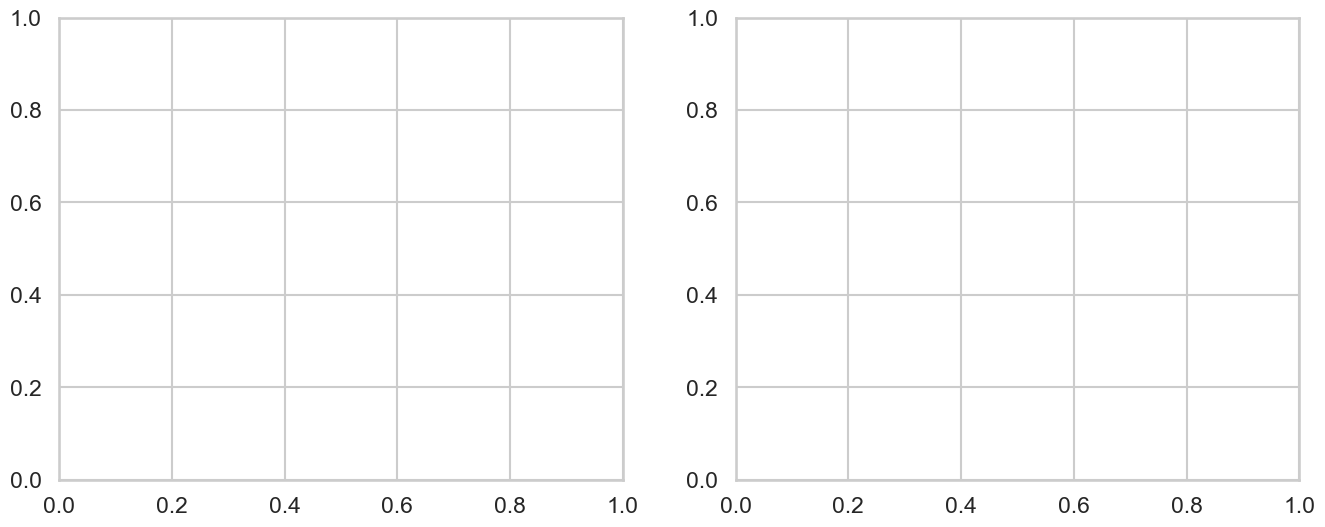

In [81]:

# Combine into one long-format DataFrame (Seaborn loves this)
df_combined = pd.concat([df_mlp, df_kan])

# 4. Plotting
fig, axes = plt.subplots(1, 2, sharex=True)

# Define custom palette
custom_palette = {"CTM MLP": "#3498db", "CTM KAN": "#e74c3c"}

In [82]:
# --- Plot 1: LOSS Comparison ---
sns.lineplot(
    data=df_combined[df_combined['Metric'] == 'Loss'],
    x="Iteration",
    y="Value",
    hue="Model",
    style="Model",        # Different line styles for accessibility
    markers=True,         # Add markers to points
    dashes=False,
    palette=custom_palette,
    linewidth=2.5,
    errorbar="sd",
    ax=axes[0]
)
axes[0].set_title("Training Loss Comparison")
axes[0].set_ylabel("Loss")
axes[0].grid(True, alpha=0.3)

# --- Plot 2: ACCURACY Comparison ---
sns.lineplot(
    data=df_combined[df_combined['Metric'] == 'Accuracy'],
    x="Iteration",
    y="Value",
    hue="Model",
    style="Model",
    markers=True,
    dashes=False,
    palette=custom_palette,
    linewidth=2.5,
    errorbar="sd",
    ax=axes[1]
)
axes[1].set_title("Training Accuracy Comparison")
axes[1].set_ylabel("Accuracy")
axes[1].grid(True, alpha=0.3)

# 5. Final Adjustments
plt.tight_layout()
plt.show()

<Figure size 1600x600 with 0 Axes>

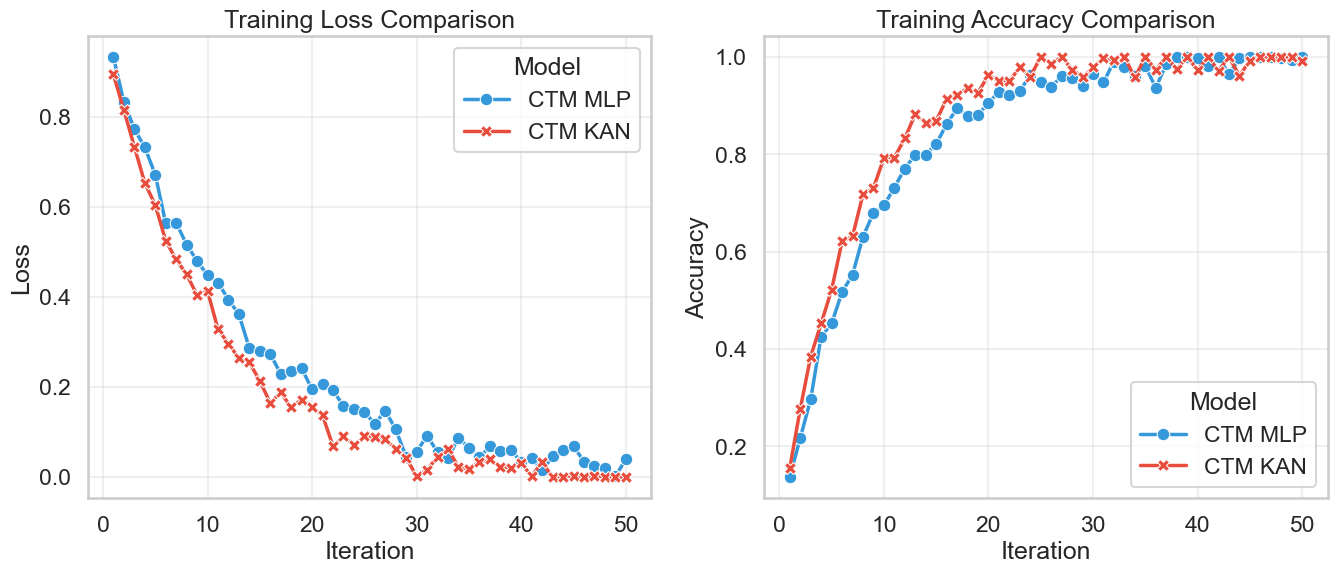

In [83]:
fig

# Standard deviation


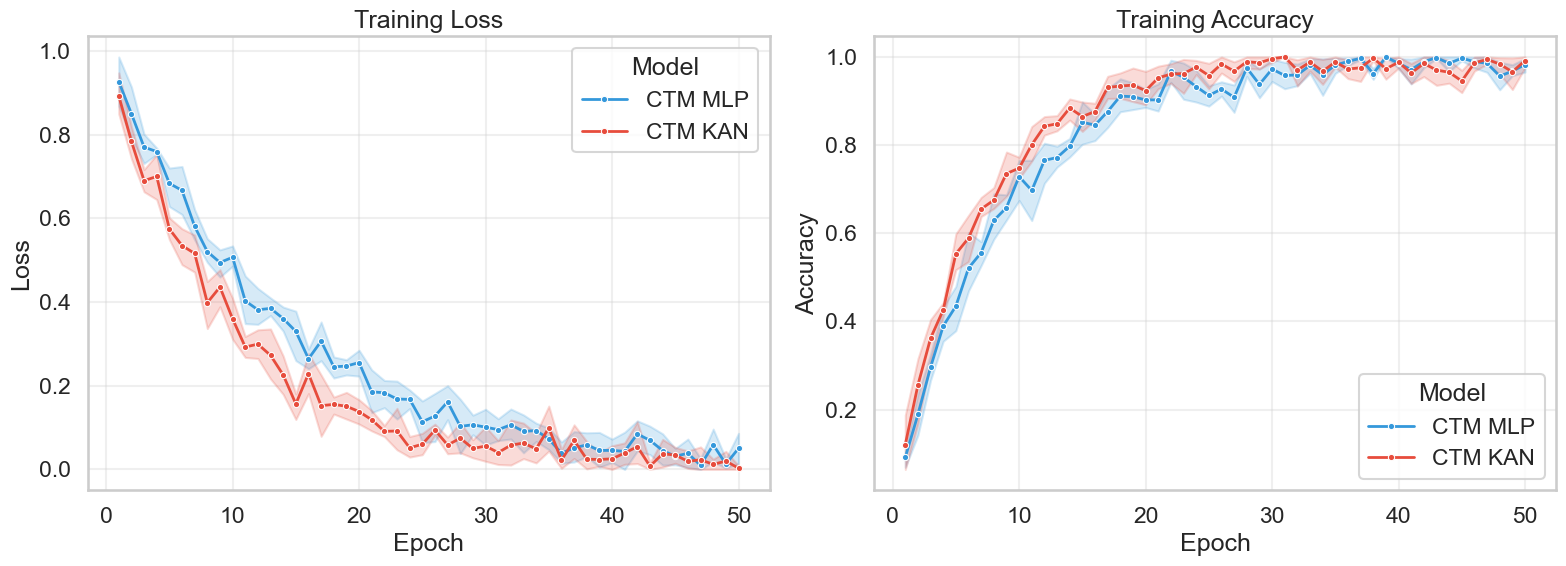

In [94]:
# 2. Function to generate multiple runs of dummy history
def generate_history_with_ci(model_name, epochs=50, num_runs=5, noise_level=0.05):
    all_data = []

    # We loop to create "runs" (simulating training the model 5 different times)
    for run in range(num_runs):
        x = np.arange(1, epochs + 1)

        # Simulate Loss (Exponential decay)
        # Randomize decay slightly per run so the lines aren't identical
        decay_rate = 0.1 if "KAN" in model_name else 0.08
        decay_jitter = np.random.uniform(-0.01, 0.01)
        loss_base = np.exp(-(decay_rate + decay_jitter) * x)
        loss = loss_base + np.random.normal(0, noise_level, size=epochs)
        loss = np.clip(loss, 0, None)

        # Simulate Accuracy
        acc_rate = 0.15 if "KAN" in model_name else 0.12
        acc_jitter = np.random.uniform(-0.01, 0.01)
        acc_base = 1 - np.exp(-(acc_rate + acc_jitter) * x)
        accuracy = acc_base + np.random.normal(0, noise_level, size=epochs)
        accuracy = np.clip(accuracy, 0, 1)

        # Append Loss Data
        all_data.append(pd.DataFrame({
            'Epoch': x,
            'Value': loss,
            'Metric': 'Loss',
            'Model': model_name,
            'Run': run
        }))

        # Append Accuracy Data
        all_data.append(pd.DataFrame({
            'Epoch': x,
            'Value': accuracy,
            'Metric': 'Accuracy',
            'Model': model_name,
            'Run': run
        }))

    return pd.concat(all_data)

# 3. Generate Data (Multiple Runs)
df_mlp = generate_history_with_ci("CTM MLP", epochs=50, num_runs=5)
df_kan = generate_history_with_ci("CTM KAN", epochs=50, num_runs=5)

df_combined = pd.concat([df_mlp, df_kan])

# 4. Plotting
fig, axes = plt.subplots(1, 2, sharex=True)

custom_palette = {"CTM MLP": "#3498db", "CTM KAN": "#e74c3c"}

# --- Plot 1: LOSS Comparison ---
sns.lineplot(
    data=df_combined[df_combined['Metric'] == 'Loss'],
    x="Epoch",
    y="Value",
    hue="Model",
    # style="Model",
    palette=custom_palette,
    linewidth=2,
    marker = '.',
    markers=True,
    errorbar='ci',  # Options: 'ci' (95% conf interval) or 'sd' (standard deviation)
    ax=axes[0]
)
axes[0].set_title("Training Loss")
axes[0].set_ylabel("Loss")
axes[0].grid(True, alpha=0.3)

# --- Plot 2: ACCURACY Comparison ---
sns.lineplot(
    data=df_combined[df_combined['Metric'] == 'Accuracy'],
    x="Epoch",
    y="Value",
    hue="Model",
    # style='Model',
    palette=custom_palette,
    linewidth=2,
    marker = '.',
    markers=True,
    errorbar='ci', # Using standard deviation often looks cleaner for deep learning curves
    ax=axes[1]
)
axes[1].set_title("Training Accuracy")
axes[1].set_ylabel("Accuracy")
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig("CTM_Model_Comparison.pdf", format='pdf', bbox_inches='tight')

plt.show()


# 7-seed averaging plots



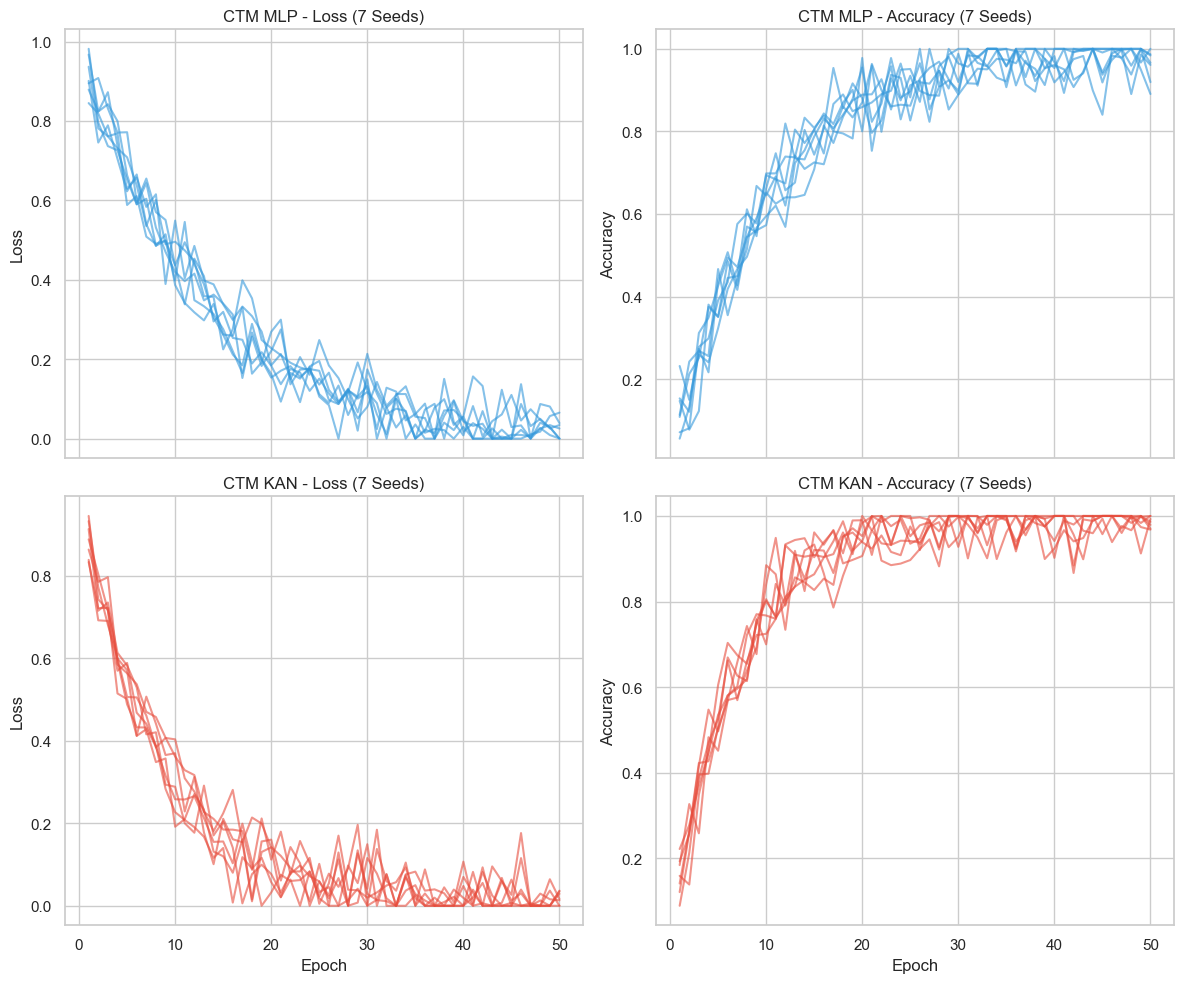

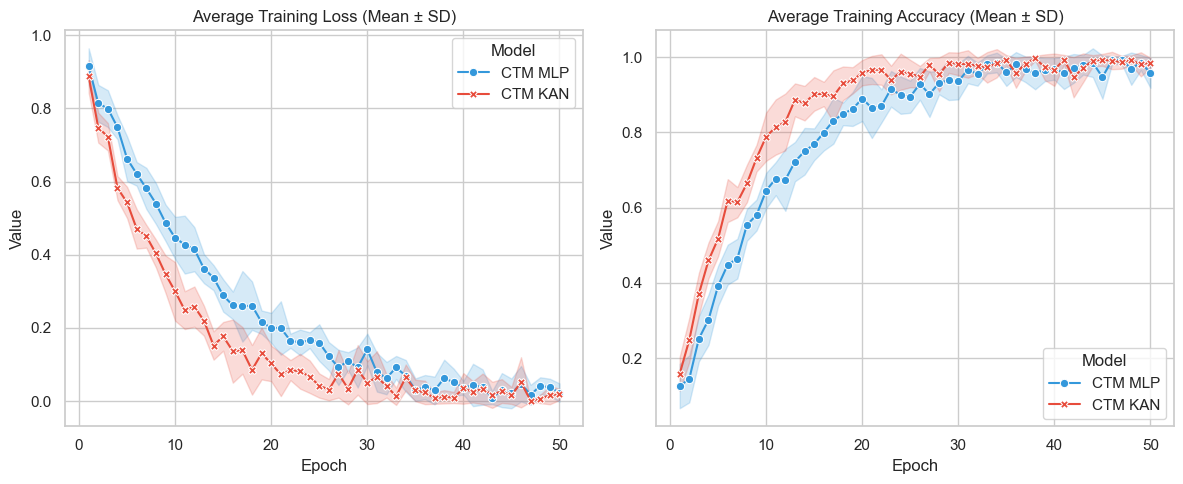

In [95]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# 1. Configuration
sns.set_theme(style="whitegrid")

# 2. Function to generate multiple runs of dummy history
def generate_history_with_ci(model_name, epochs=50, num_runs=7, noise_level=0.05):
    all_data = []

    for run in range(num_runs):
        x = np.arange(1, epochs + 1)

        # --- Simulate Loss ---
        # KAN converges faster (higher rate) but might be noisier in this sim
        decay_rate = 0.12 if "KAN" in model_name else 0.08
        decay_jitter = np.random.uniform(-0.01, 0.01) # Randomize physics per seed

        loss_base = np.exp(-(decay_rate + decay_jitter) * x)
        loss = loss_base + np.random.normal(0, noise_level, size=epochs)
        loss = np.clip(loss, 0, None)

        # --- Simulate Accuracy ---
        acc_rate = 0.15 if "KAN" in model_name else 0.10
        acc_jitter = np.random.uniform(-0.01, 0.01)

        acc_base = 1 - np.exp(-(acc_rate + acc_jitter) * x)
        accuracy = acc_base + np.random.normal(0, noise_level, size=epochs)
        accuracy = np.clip(accuracy, 0, 1)

        # Append Loss Data
        all_data.append(pd.DataFrame({
            'Epoch': x,
            'Value': loss,
            'Metric': 'Loss',
            'Model': model_name,
            'Run': run
        }))

        # Append Accuracy Data
        all_data.append(pd.DataFrame({
            'Epoch': x,
            'Value': accuracy,
            'Metric': 'Accuracy',
            'Model': model_name,
            'Run': run
        }))

    return pd.concat(all_data)

# 3. Generate Data (7 Seeds)
df_mlp = generate_history_with_ci("CTM MLP", epochs=50, num_runs=7)
df_kan = generate_history_with_ci("CTM KAN", epochs=50, num_runs=7)
df_combined = pd.concat([df_mlp, df_kan])

# ==========================================
# PLOT 1: INDIVIDUAL SEEDS (Spaghetti Plot)
# ==========================================
# We create a 2x2 Grid: Rows = Models, Cols = Metrics
fig_ind, axes_ind = plt.subplots(2, 2, figsize=(12, 10), sharex=True)

models = ["CTM MLP", "CTM KAN"]
metrics = ["Loss", "Accuracy"]
colors = {"CTM MLP": "#3498db", "CTM KAN": "#e74c3c"}

for row_idx, model in enumerate(models):
    for col_idx, metric in enumerate(metrics):
        ax = axes_ind[row_idx, col_idx]

        # Filter data for this specific subplot
        subset = df_combined[(df_combined['Model'] == model) & (df_combined['Metric'] == metric)]

        # Plot individual lines
        # units="Run" + estimator=None tells Seaborn to plot every seed separately
        sns.lineplot(
            data=subset,
            x="Epoch",
            y="Value",
            units="Run",       # Group by seed ID
            estimator=None,    # Do not aggregate/average
            color=colors[model],
            alpha=0.6,         # Transparency to see overlapping lines
            linewidth=1.5,
            ax=ax
        )

        ax.set_title(f"{model} - {metric} (7 Seeds)")
        ax.set_ylabel(metric)

plt.tight_layout()
plt.savefig("CTM_Individual_Seeds.pdf")


# ==========================================
# PLOT 2: AVERAGED COMPARISON
# ==========================================
fig_avg, axes_avg = plt.subplots(1, 2, figsize=(12, 5), sharex=True)

# Comparison Plot: Loss
sns.lineplot(
    data=df_combined[df_combined['Metric'] == 'Loss'],
    x="Epoch",
    y="Value",
    hue="Model",
    style="Model",      # Different line styles
    palette=colors,
    markers=True,       # Markers now work because 'style' is set
    dashes=False,       # Keep lines solid (optional)
    errorbar='sd',      # Standard Deviation bands
    ax=axes_avg[0]
)
axes_avg[0].set_title("Average Training Loss (Mean ± SD)")

# Comparison Plot: Accuracy
sns.lineplot(
    data=df_combined[df_combined['Metric'] == 'Accuracy'],
    x="Epoch",
    y="Value",
    hue="Model",
    style="Model",
    palette=colors,
    markers=True,
    dashes=False,
    errorbar='sd',
    ax=axes_avg[1]
)
axes_avg[1].set_title("Average Training Accuracy (Mean ± SD)")

plt.tight_layout()
plt.savefig("CTM_Averaged_Comparison.pdf")

plt.show()